#Step 1: Import the Dataset

In [75]:
# Step 1: Import the Dataset

import pandas as pd

# 1. Load the dataset
file_path = '/content/drive/MyDrive/Kiddocare Test Case Assesment/BA Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Customer ID,Age,Gender,Annual Income (RM),Spending Score (1-100)
0,1001,56,M,"45,939",80
1,1002,69,M,"68,925",93
2,1003,46,M,"62,941",3
3,1004,32,M,"41,834",20
4,1005,60,M,"38,047",59


#Step 2: Data Exploration

In [76]:
# Step 2: Data Exploration

# 2.1 Check for missing values
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Annual Income (RM),0
Spending Score (1-100),0


In [77]:
# 2.2 Check data types
df.dtypes


,0
Customer ID,int64
Age,int64
Gender,object
Annual Income (RM),object
Spending Score (1-100),int64


In [78]:
# Changing Annual Income from object type to integer type
# Remove commas from 'Annual Income' and convert to integer
df['Annual Income (RM)'] = df['Annual Income (RM)'].str.replace(',', '').astype(int)

# Verify the change
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Annual Income (RM),int64
Spending Score (1-100),int64


In [79]:
# Convert 'Customer ID' to object type
df['Customer ID'] = df['Customer ID'].astype(str)

# Verify the change
df.dtypes

,0
Customer ID,object
Age,int64
Gender,object
Annual Income (RM),int64
Spending Score (1-100),int64


In [80]:
df.head()

,Customer ID,Age,Gender,Annual Income (RM),Spending Score (1-100)
0,1001,56,M,45939,80
1,1002,69,M,68925,93
2,1003,46,M,62941,3
3,1004,32,M,41834,20
4,1005,60,M,38047,59


In [81]:
# 2.3 Get summary statistics
df.describe()

,Age,Annual Income (RM),Spending Score (1-100)
count,100.000000,100.000000,100.000000
mean,45.360000,92316.180000,51.720000
std,14.624264,36546.261173,29.972405
min,18.000000,32871.000000,1.000000
25%,32.000000,58531.000000,24.750000
50%,45.500000,91954.000000,52.500000
75%,57.250000,127581.250000,78.250000
max,69.000000,149974.000000,100.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             100 non-null    object
 1   Age                     100 non-null    int64 
 2   Gender                  100 non-null    object
 3   Annual Income (RM)      100 non-null    int64 
 4   Spending Score (1-100)  100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


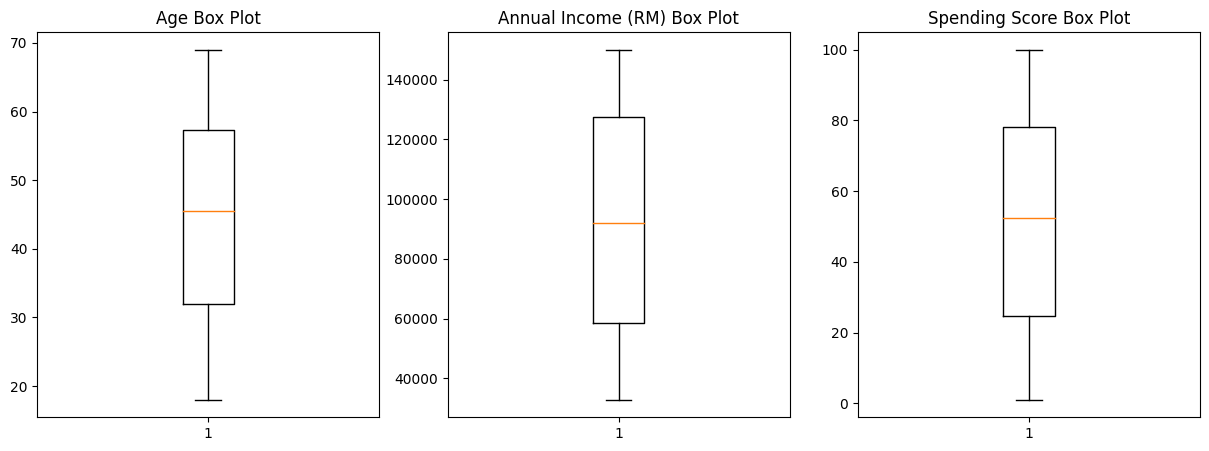

In [83]:
# Identify and address any anomalies or outliers using Box Plot Visualisation

import matplotlib.pyplot as plt

# Create box plots for Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
plt.boxplot(df['Annual Income (RM)'])
plt.title('Annual Income (RM) Box Plot')

plt.subplot(1, 3, 3)
plt.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score Box Plot')

plt.show()


In [84]:
# Function to identify outliers
def identify_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to print outliers or a message if none are found
def print_outliers(outliers, column_name):
    if outliers.empty:
        print(f"No outliers found in {column_name}")
    else:
        print(f"{column_name} Outliers:\n{outliers}")

# Identify and print outliers in Age, Annual Income, and Spending Score
age_outliers = identify_outliers('Age')
income_outliers = identify_outliers('Annual Income (RM)')
spending_outliers = identify_outliers('Spending Score (1-100)')

print_outliers(age_outliers, 'Age')
print_outliers(income_outliers, 'Annual Income')
print_outliers(spending_outliers, 'Spending Score')


No outliers found in Age
No outliers found in Annual Income
No outliers found in Spending Score


#Step 3: Data Visualization

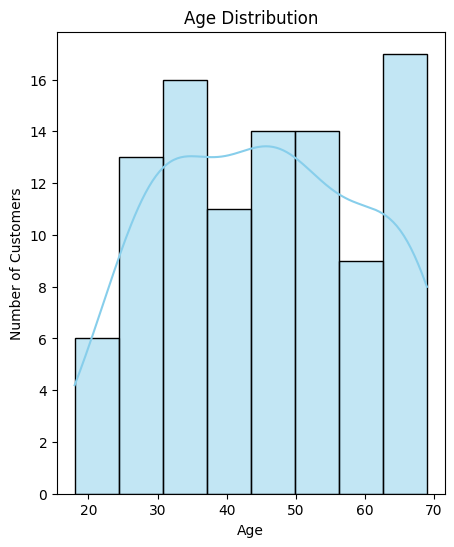

In [85]:
# 3.1 Age Distribution
import seaborn as sns

plt.figure(figsize=(5, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


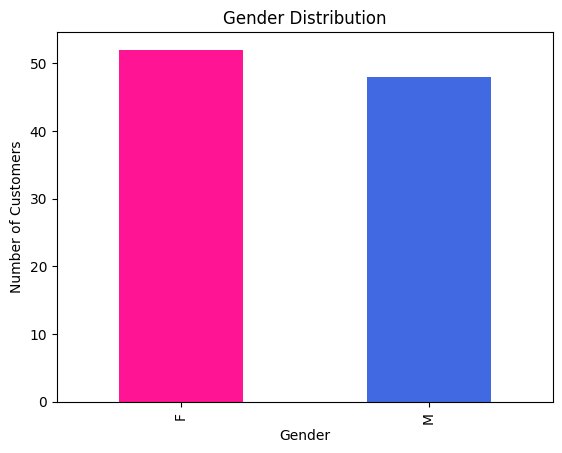

In [86]:
# 3.2 Gender Distribution
# Gender distribution
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['deeppink', 'royalblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

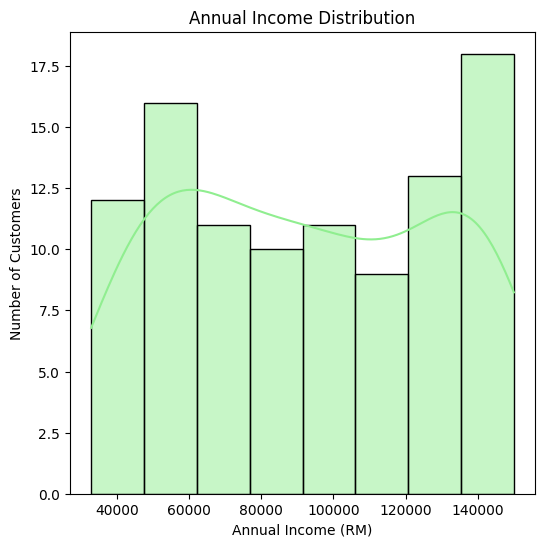

In [87]:
# 3.3 Annual Income Distribution
# Annual Income distribution
plt.figure(figsize=(6, 6))
sns.histplot(df['Annual Income (RM)'], kde=True, color='lightgreen')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (RM)')
plt.ylabel('Number of Customers')
plt.show()

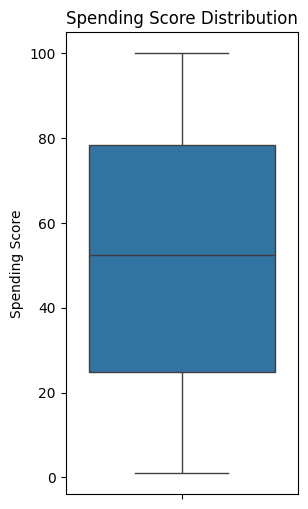

In [88]:
# 3.4 Spending Score Distribution
# Spending Score box plot
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.ylabel('Spending Score')
plt.show()

#Step 4: Customer Segmentation (Clustering Analysis)

In [89]:
# Replace 'M' with 1 and 'F' with 0 in the 'Gender' column

df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

In [95]:
# Using scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['Age', 'Annual Income (RM)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Step 5: Determine Optimal Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

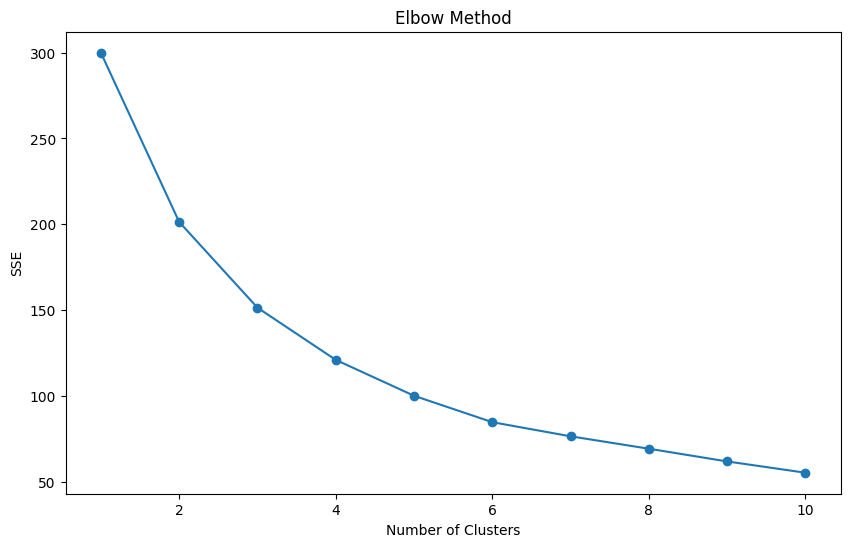

In [96]:
# Elbow method to find optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


#Step 6: Visualize Clusters

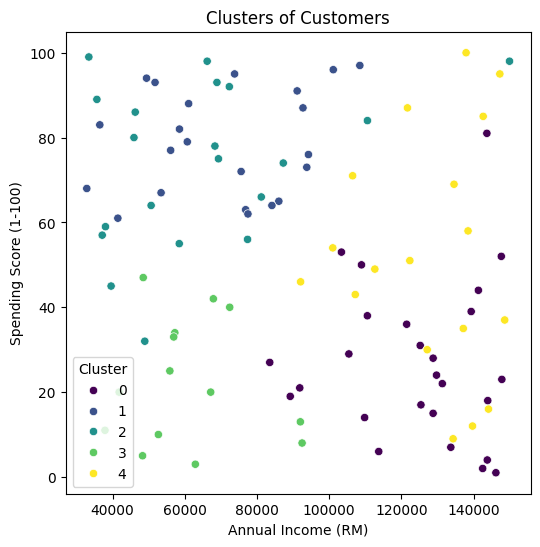

In [97]:
# Visualize clusters based on Age, Annual Income, and Spending Score
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (RM)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (RM)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Step 7: Interpret the Results

In [98]:
# Group the data by clusters and calculate the mean for each group, excluding non-numeric columns
cluster_averages = df.groupby('Cluster')[['Gender', 'Age', 'Annual Income (RM)', 'Spending Score (1-100)']].mean()

# Display the cluster averages
print(cluster_averages)

           Gender        Age  Annual Income (RM)  Spending Score (1-100)
Cluster                                                                 
0        0.500000  57.807692       124528.692308               26.961538
1        0.363636  33.863636        70801.409091               78.772727
2        0.600000  59.800000        64298.500000               74.000000
3        0.428571  35.785714        61032.285714               22.214286
4        0.500000  32.833333       127545.500000               52.611111


#Interpretation of the Results
***1. Cluster 0:***

•	Gender Distribution: Equal distribution between males and females (50% each).

•	Age: This segment consists of older customers with an average age of approximately 58 years.

•	Annual Income: Customers in this segment have a high annual income, averaging around RM 124,528.

•	Spending Score: Despite having a high income, their spending score is relatively low, averaging around 27, indicating conservative spending behavior.

**Key Characteristics and Purchasing Behavior:**

•	Demographic: Older, affluent customers with a balanced gender distribution.

•	Behavior: They are likely to be cautious spenders, preferring to save or invest rather than spend on luxury or non-essential items.
________________________________________

***2. Cluster 1:***

•	Gender Distribution: Skewed towards females.

•	Age: This segment includes relatively young customers, with an average age of about 34 years.


•	Annual Income: This group has a moderate income level, averaging around RM 70,801.

•	Spending Score: High spending score of approximately
79, indicating a tendency towards higher spending.

**Key Characteristics and Purchasing Behavior:**

•	Demographic: Young males with moderate income.

•	Behavior: They are likely to be impulsive buyers or individuals who enjoy spending on experiences, leisure, or luxury items despite not having very high incomes.
________________________________________

***3. Cluster 2:***

•	Gender Distribution: Slightly more males.

•	Age: Older customers with an average age of about 60 years.

•	Annual Income: This group has the lowest income level, averaging around RM 64,299.

•	Spending Score: Despite the lower income, they have a high spending score of around 74.

**Key Characteristics and Purchasing Behavior:**

•	Demographic: Older males with low to moderate income.

•	Behavior: This group might prioritize spending on specific high-value items or services, possibly driven by necessities or particular preferences, despite lower income levels.
________________________________________
***4. Cluster 3:***

•	Gender Distribution: Skewed towards females.

•	Age: Younger customers with an average age of around 36 years.

•	Annual Income: This segment has the lowest average income, around RM 61,032.

•	Spending Score: Very low spending score of approximately 22, indicating a highly conservative spending pattern.

**Key Characteristics and Purchasing Behavior:**

•	Demographic: Young customers with low income and conservative spending habits.

•	Behavior: They are likely to prioritize essential purchases and avoid luxury or discretionary spending, possibly due to budget constraints.
________________________________________
***5. Cluster 4:***

•	Gender Distribution: Equal distribution between males and females (50% each).

•	Age: The youngest segment with an average age of approximately 33 years.

•	Annual Income: This segment has a high annual income, averaging around RM 127,545.

•	Spending Score: Moderate spending score of around 53, indicating balanced spending behavior.

**Key Characteristics and Purchasing Behavior:**

•	Demographic: Young, affluent customers with a balanced gender distribution.

•	Behavior: They are likely to be strategic spenders, balancing between saving and spending on luxury items or experiences.


#8. Recommendations

***Cluster 0: Older, Rich, and Careful Spenders***

•	Marketing Strategy:

o	Build Trust: Show that Kiddocare is safe and reliable. Highlight that babysitters are carefully checked.

o	Family Focus: Talk about how Kiddocare is great for grandparents or experienced parents who want the best care.

•	Personalized Offers:

o	Long-Term Discounts: Offer deals for long-term babysitting plans to match their need for stability.

o	Referral Program: Encourage them to refer Kiddocare to younger family members or friends.

•	Communication Approach:

o	Direct Mail or Email: Use direct mail or emails with detailed information to build trust.

***Cluster 1: Young, Middle-Income, High Spenders***

•	Marketing Strategy:

o	Convenience: Show how easy it is to book a babysitter, especially for busy parents or last-minute needs.

o	Lifestyle Fit: Emphasize how Kiddocare fits into their busy lifestyle, allowing them to enjoy life while knowing their kids are safe.

•	Personalized Offers:

o	Flexible Packages: Offer flexible and short-term babysitting plans to suit their unpredictable schedules.

o	Event-Based Offers: Provide special deals during weekends or holidays when they might need more babysitting.

•	Communication Approach:

o	Social Media: Use social media and mobile ads to reach them. Highlight the quick and easy booking process.

***Cluster 2: Older, Low Income, High Spenders***

•	Marketing Strategy:

o	Affordable Quality: Focus on how Kiddocare offers top babysitters at reasonable prices.

o	Necessity: Position Kiddocare as a must-have service for their needs, even on a budget.

•	Personalized Offers:

o	Loyalty Program: Offer rewards for frequent use, like discounts or free babysitting after several bookings.

o	Affordable Plans: Provide options that are budget-friendly but still meet their needs.

•	Communication Approach:

o	Targeted Emails: Send emails that emphasize value and affordability with testimonials from similar people.

***Cluster 3: Young, Low Income, Careful Spenders***

•	Marketing Strategy:

o	Cost-Effective: Highlight Kiddocare’s competitive pricing and how it saves them money.

o	Essential Service: Show that Kiddocare is a necessary service to help balance work and family without overspending.

•	Personalized Offers:

o	Budget Packages: Offer simple, affordable babysitting plans without extra costs.

o	First-Time Discounts: Provide discounts to new users to encourage them to try Kiddocare.

•	Communication Approach:

o	Simple Messaging: Use clear and simple messages via SMS or email, focusing on cost savings.

***Cluster 4: Young, Rich, Balanced Spenders***

•	Marketing Strategy:

o	Premium Services: Highlight any extra features Kiddocare offers, like specially trained babysitters.

o	Convenience and Flexibility: Show how Kiddocare can easily fit into their busy, affluent lifestyle.

•	Personalized Offers:

o	Premium Packages: Offer babysitting packages with extra perks, like video updates or extended hours.

o	Exclusive Deals: Provide special deals or rewards for frequent use, appealing to their balanced spending habits.

•	Communication Approach:

o	Multi-Channel: Use social media, app notifications, and personalized emails to reach this group, highlighting premium services.


In [99]:
# Export the latest dataset to a CSV file
df.to_csv('exported_dataset.csv', index=False)